In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hamiltonian import adjacency_hypercube_lattice, construct_ising_hamiltonian
import pandas as pd
from correlation_function import time_correlation
from lr_velocity import plot_light_cone

from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import sys

np.random.seed(42)

In [3]:
# Simulation Parameters

# length of lattice (Number of Lattice Sites) : Recommended to use an odd number for more symmetric plots.
L = 13

# time-step size
dt = 0.007

# number of time steps
N = 1000

# initial state
psi0 = np.random.randn(2**L) + 1j * np.random.randn(2**L)

# 2x2 Pauli Matrices
Pauli_Z = np.array([[1, 0],[0, -1]])
Pauli_Y = np.array([[0, -1j],[1j, 0]])
Pauli_X = np.array([[0, 1],[1, 0]])

# adjacency matrix for the system
adjacency_matrix = adjacency_hypercube_lattice(L, 1)

### Simulation for h < 0 : (h = -0.5)


Time Evolution : Started

Time Evolution : Finished


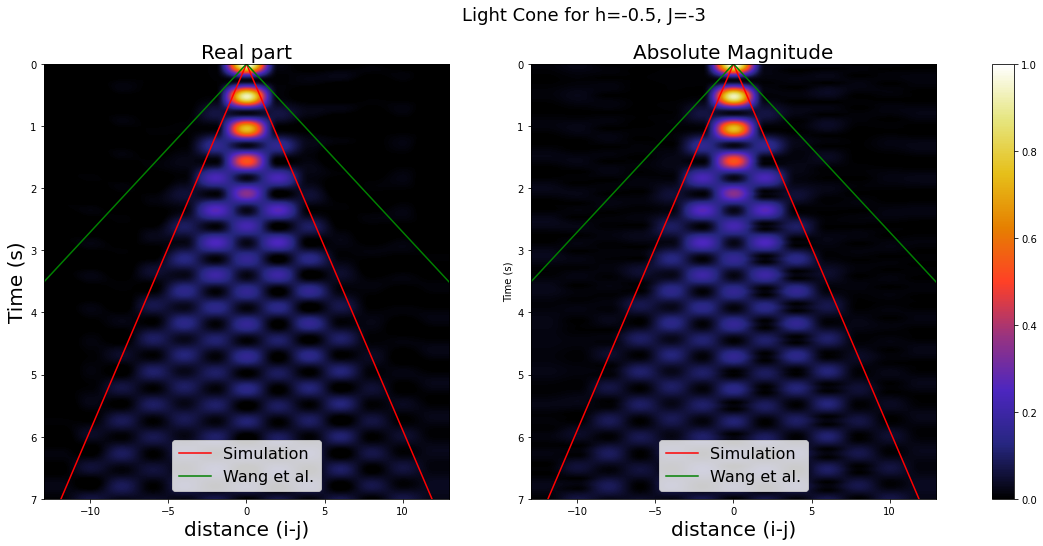


J :  -3 , L-R Velocity (estimated):  1.6973125884016973 , L-R Velocity (theoretical):  3.6987295116025987

Time Evolution : Started

Time Evolution : Finished


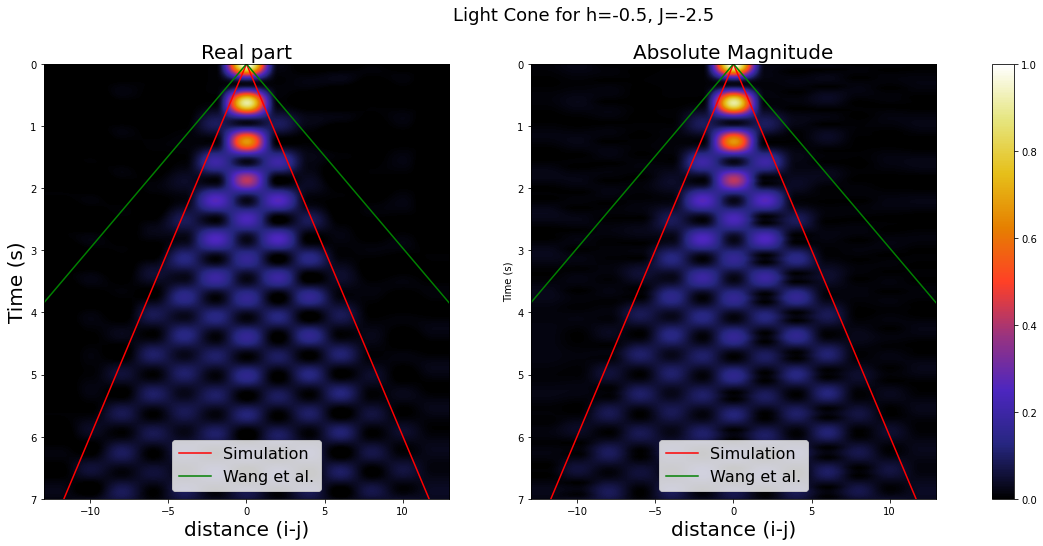


J :  -2.5 , L-R Velocity (estimated):  1.670843776106934 , L-R Velocity (theoretical):  3.3764626460246827

Time Evolution : Started

Time Evolution : Finished


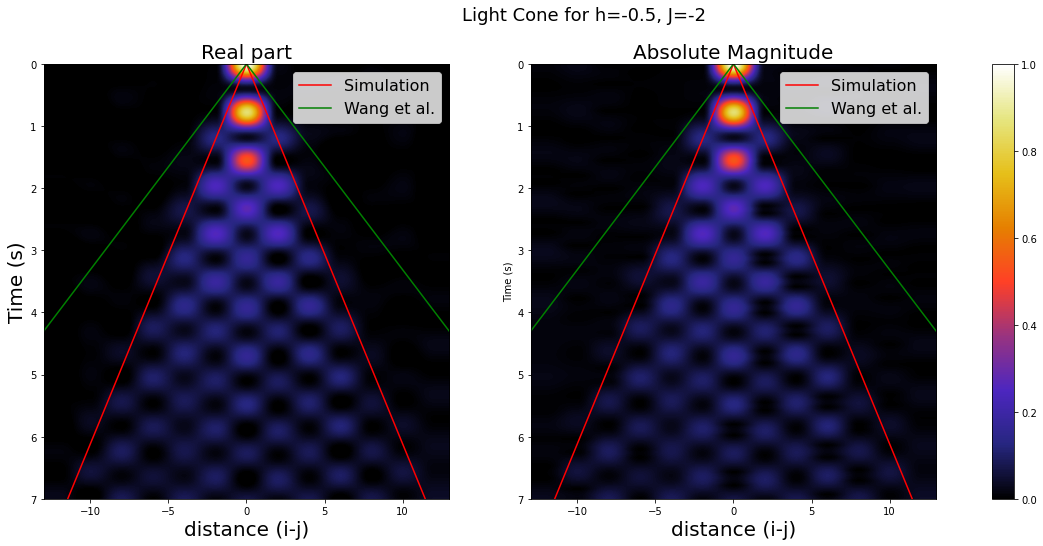


J :  -2 , L-R Velocity (estimated):  1.6357688113413305 , L-R Velocity (theoretical):  3.02

Time Evolution : Started

Time Evolution : Finished


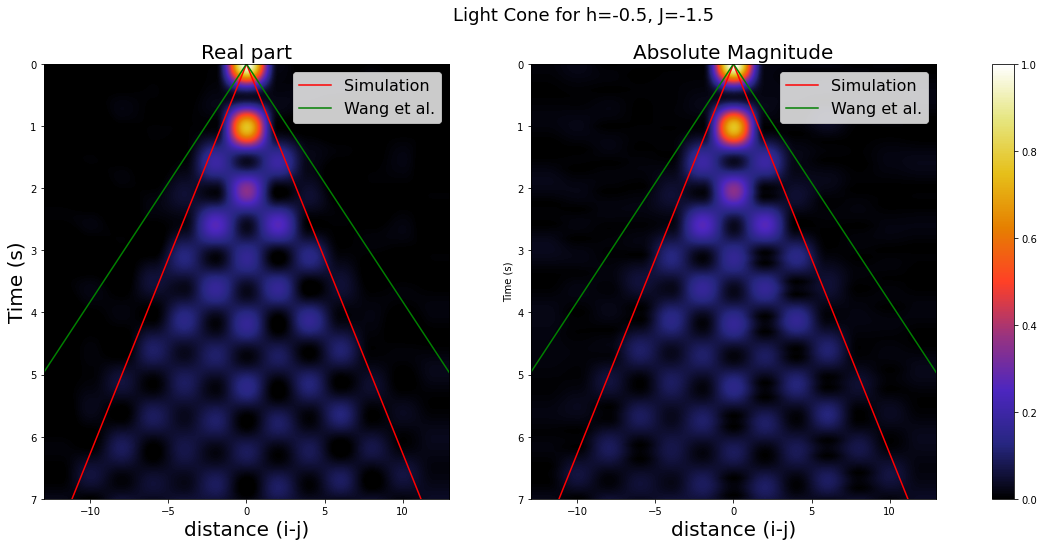


J :  -1.5 , L-R Velocity (estimated):  1.596169193934557 , L-R Velocity (theoretical):  2.6153967194290044

Time Evolution : Started

Time Evolution : Finished


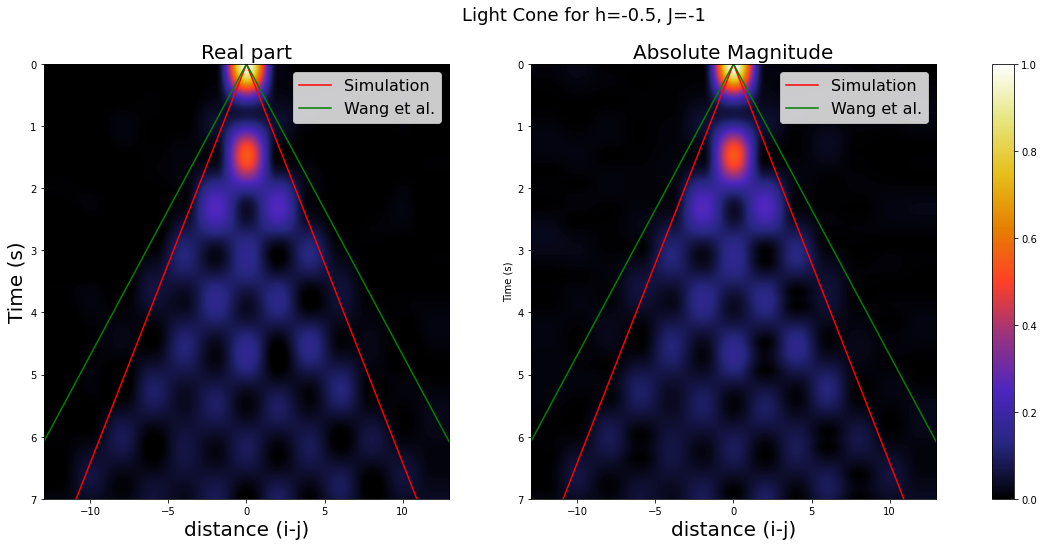


J :  -1 , L-R Velocity (estimated):  1.5584415584415585 , L-R Velocity (theoretical):  2.135462479183374

Time Evolution : Started

Time Evolution : Finished


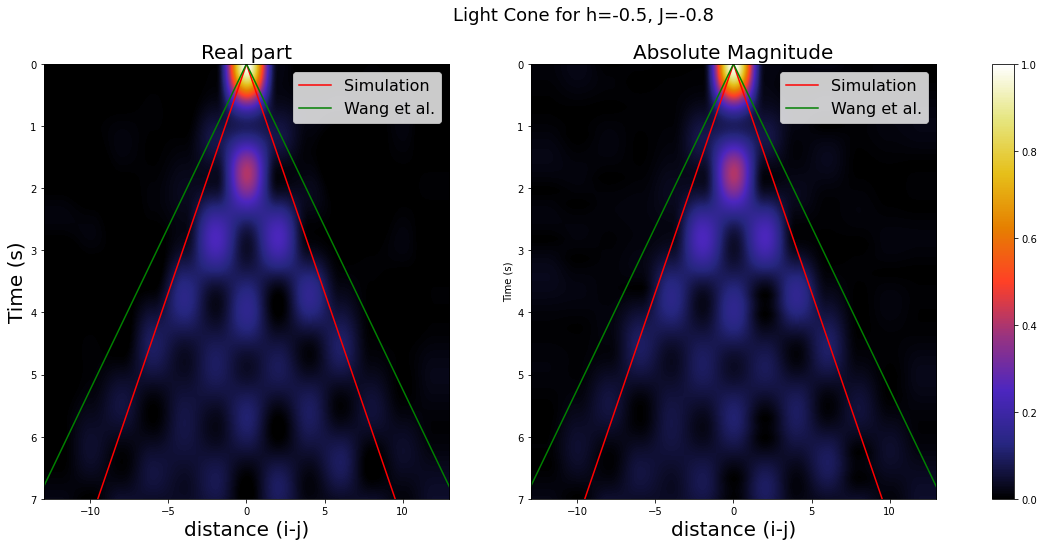


J :  -0.8 , L-R Velocity (estimated):  1.3605442176870748 , L-R Velocity (theoretical):  1.9100157067417012

Time Evolution : Started

Time Evolution : Finished


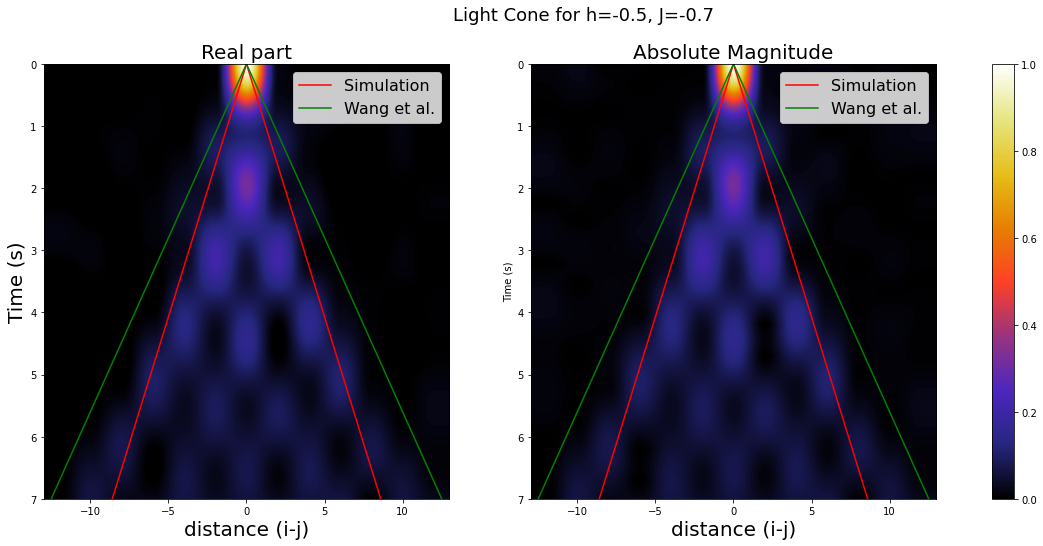


J :  -0.7 , L-R Velocity (estimated):  1.2279983626688498 , L-R Velocity (theoretical):  1.786656094496084

Time Evolution : Started

Time Evolution : Finished


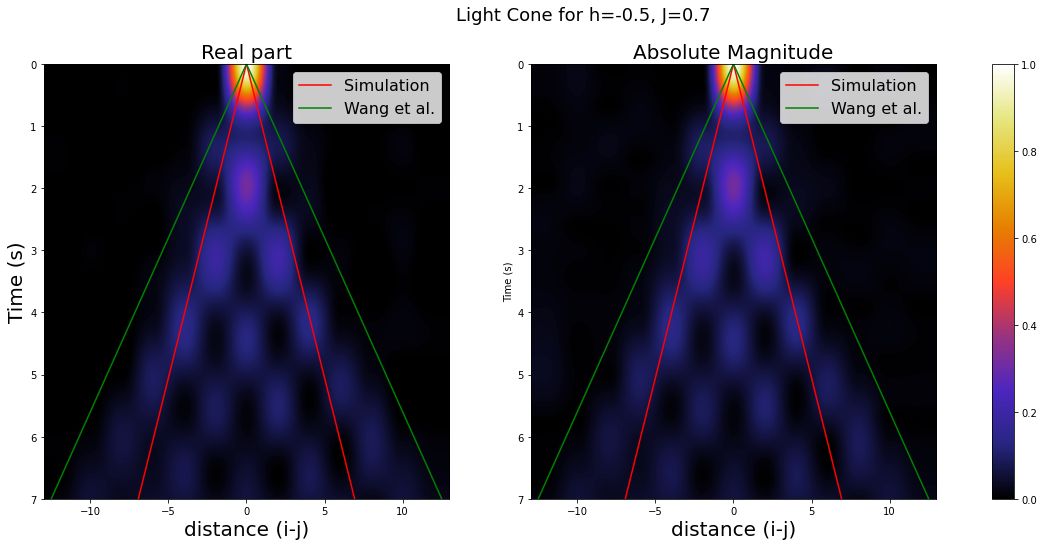


J :  0.7 , L-R Velocity (estimated):  0.9897723523589574 , L-R Velocity (theoretical):  1.786656094496084

Time Evolution : Started

Time Evolution : Finished


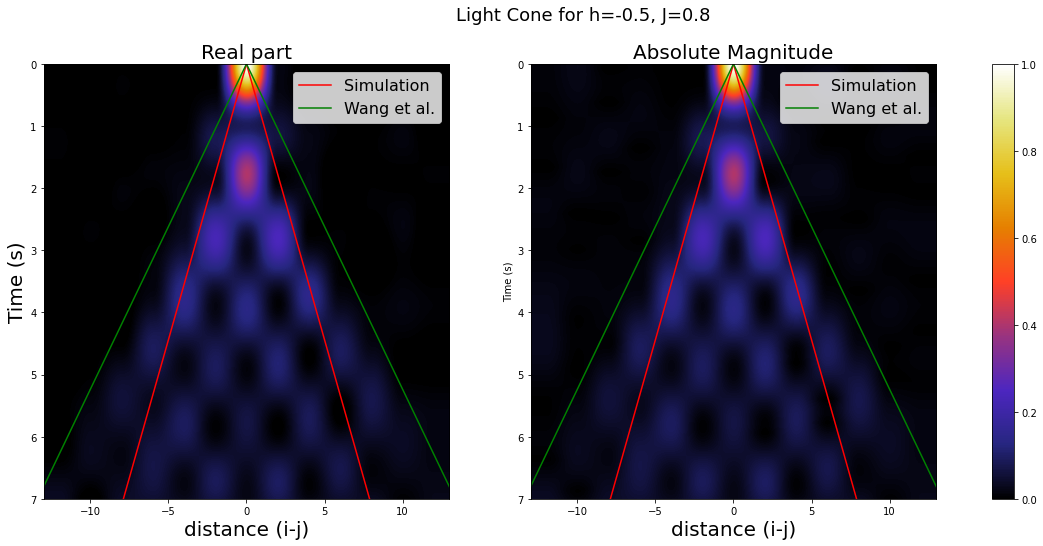


J :  0.8 , L-R Velocity (estimated):  1.1263375258119017 , L-R Velocity (theoretical):  1.9100157067417012

Time Evolution : Started

Time Evolution : Finished


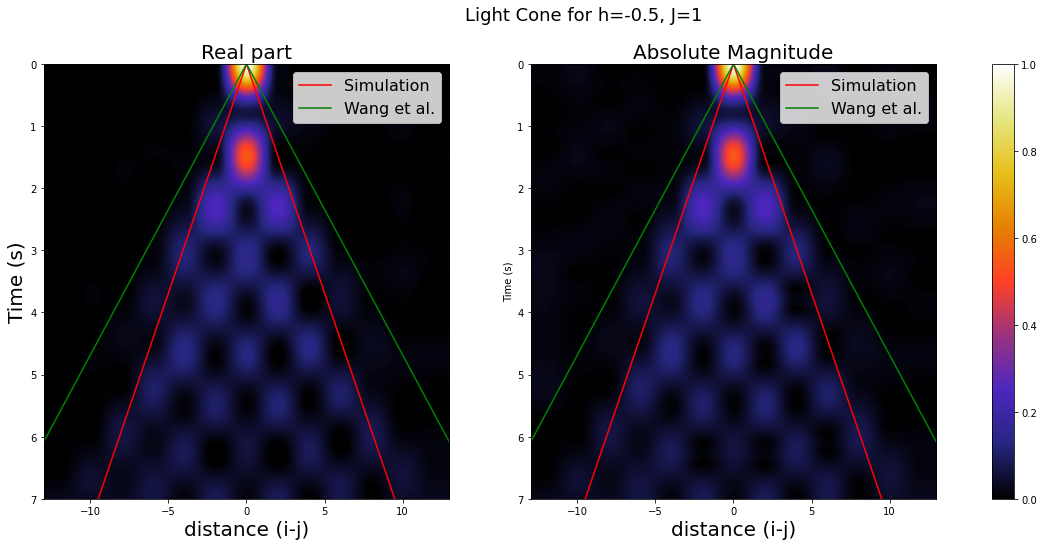


J :  1 , L-R Velocity (estimated):  1.3562386980108498 , L-R Velocity (theoretical):  2.135462479183374

Time Evolution : Started

Time Evolution : Finished


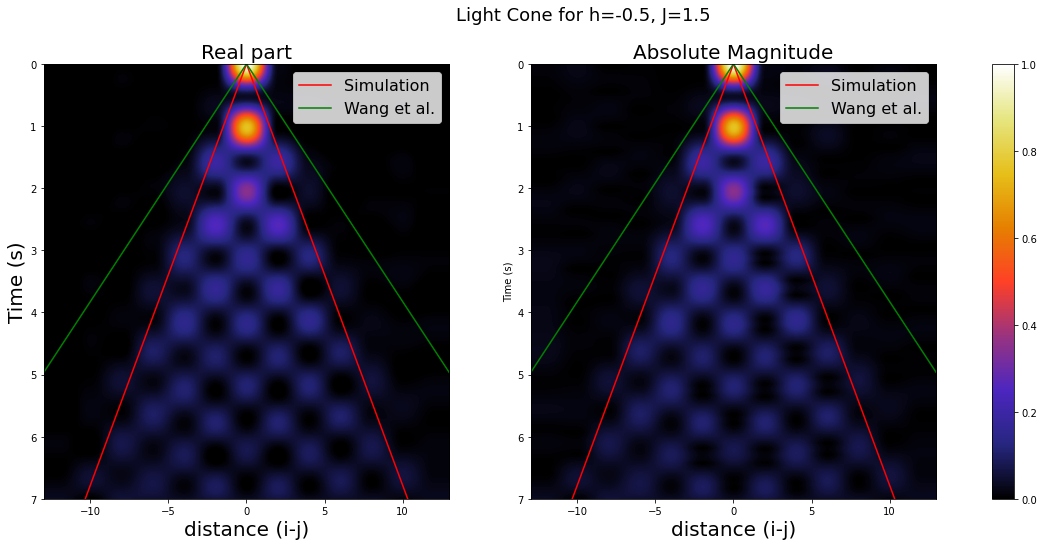


J :  1.5 , L-R Velocity (estimated):  1.4752889107450209 , L-R Velocity (theoretical):  2.6153967194290044

Time Evolution : Started

Time Evolution : Finished


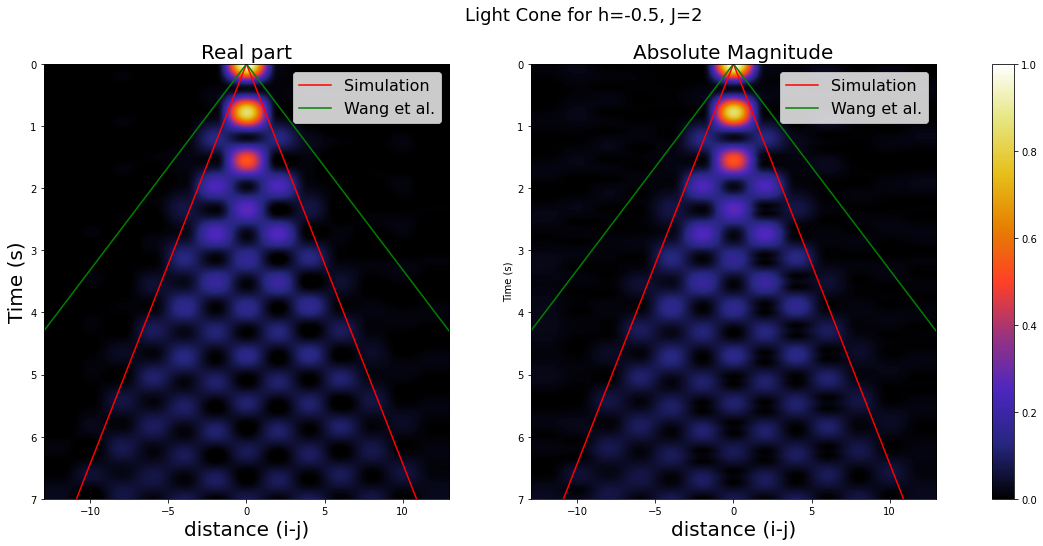


J :  2 , L-R Velocity (estimated):  1.5556131708581797 , L-R Velocity (theoretical):  3.02

Time Evolution : Started

Time Evolution : Finished


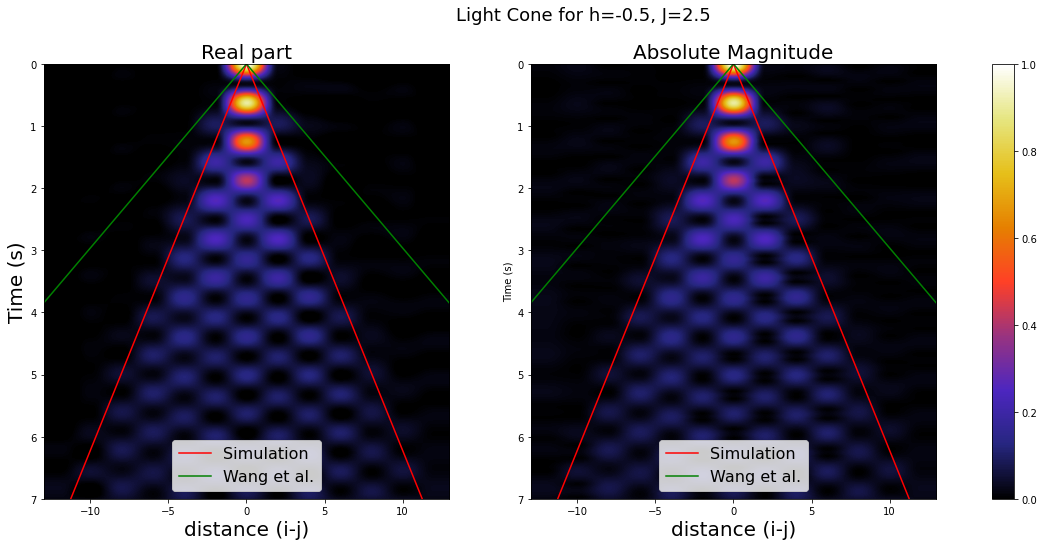


J :  2.5 , L-R Velocity (estimated):  1.6081479496113642 , L-R Velocity (theoretical):  3.3764626460246827

Time Evolution : Started

Time Evolution : Finished


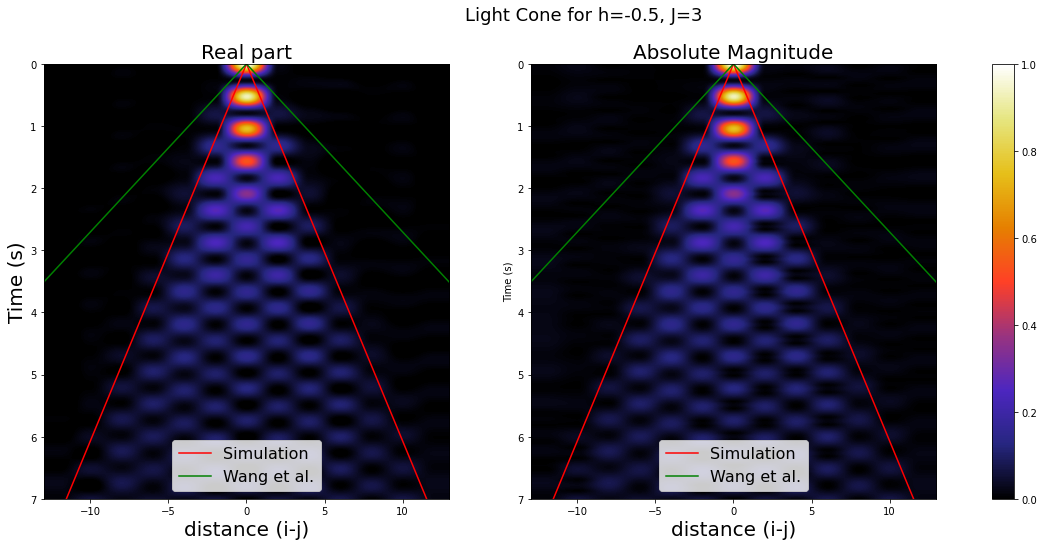


J :  3 , L-R Velocity (estimated):  1.6483516483516483 , L-R Velocity (theoretical):  3.6987295116025987


In [3]:
J_list = [-3, -2.5, -2, -1.5, -1, -0.8, -0.7, 0, 0.7, 0.8, 1, 1.5, 2, 2.5, 3]
h = -0.5
theoretical_values = []
estimated_values = []
threshold = 0.009

for J in J_list:
    if (J == 0):
        lr_vel = 0
        theoretical_vel = 0
        theoretical_values.append(theoretical_vel)
        estimated_values.append(lr_vel)
        continue

    H = construct_ising_hamiltonian(J, h, adjacency_matrix)
    correlations = time_correlation(L, dt, N, psi0, Pauli_X, H)
    v_estimated, v_theoretical = plot_light_cone(correlations, dt, N, L, h, J, threshold=threshold)
    print("\nJ : ", J , ", L-R Velocity (estimated): ", v_estimated, ", L-R Velocity (theoretical): ", v_theoretical)
    theoretical_values.append(v_theoretical)
    estimated_values.append(v_estimated)


### Fit a smooth interpolated line to the experimental values.

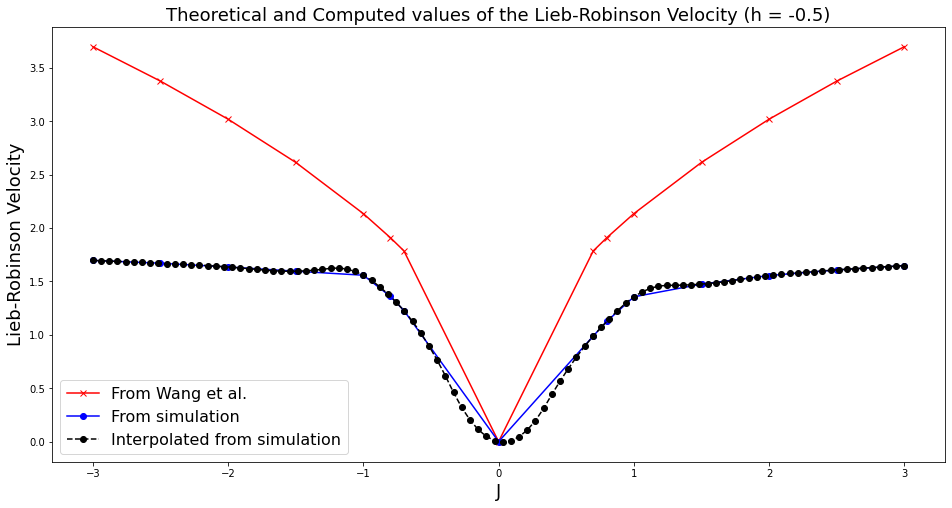

In [14]:
J_new = np.linspace(-3, 3, num=100, endpoint=True)
filtered_values = savgol_filter(theoretical_values, 3 , 2)
interpolated_function = interp1d(J_list, estimated_values, kind='quadratic')
interpolated_values = interpolated_function(J_new)

plt.figure(figsize=(16,8))
plt.plot(J_list, theoretical_values, marker='x', color='red', label='From Wang et al.')
plt.plot(J_list, estimated_values, marker='o', color='blue', label='From simulation')
plt.plot(J_new, interpolated_values, '--', marker='o', color='black', label='Interpolated from simulation')
plt.xlabel('J', fontsize=18)
plt.ylabel('Lieb-Robinson Velocity', fontsize=18)
plt.title(f'Theoretical and Computed values of the Lieb-Robinson Velocity (h = {h})', fontsize=18)
plt.legend(fontsize=16)
plt.savefig('plots/theoretical-v-all')

### Visualizing the evolution of correlations for selected timesteps for all lattice sites.

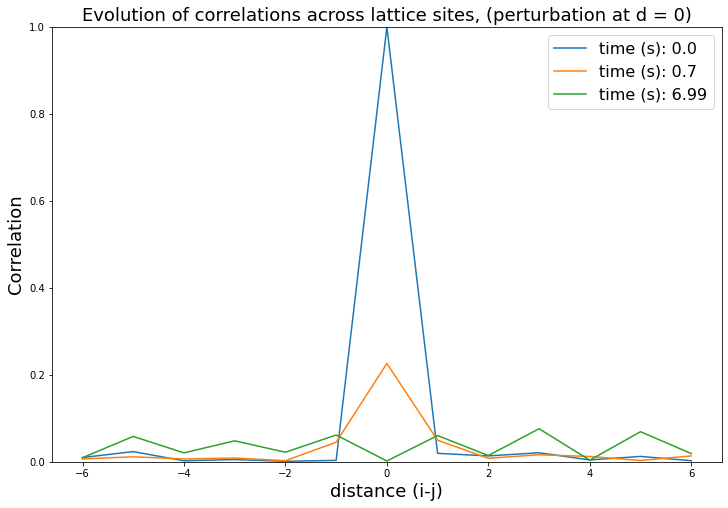

<Figure size 432x288 with 0 Axes>

In [21]:
# Time-steps for which the visualization is desired.
steps = [0, 100, 999]

plt.figure(figsize=(12,8))
for step in steps:
    plt.plot(np.linspace(-np.floor(L/2), np.floor(L/2), L, endpoint=True), np.abs(correlations[step,:]), label=f'time (s): {round(step * dt, 2)}')
plt.xlabel("distance (i-j)", fontsize=18)
plt.ylabel("Correlation", fontsize=18)
plt.ylim(0, 1)
plt.title('Evolution of correlations across lattice sites, (perturbation at d = 0)', fontsize=18)
plt.legend(fontsize=16)
plt.show()
plt.savefig('plots/correlations_all_sites')

### Visualizing the evolution of correlations for selected lattice sites for all time-steps.

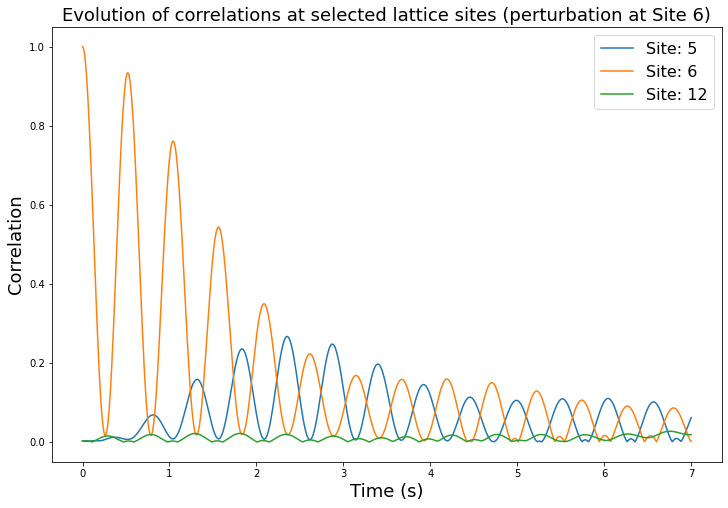

<Figure size 432x288 with 0 Axes>

In [18]:
# Sites for which the visualization is desired
sites = [4, 5, 11]

time = np.linspace(0, N * dt, N, endpoint=True)
plt.figure(figsize=(12,8))
for site in sites:
    plt.plot(time, np.abs(correlations[:,site+1]), label=f'Site: {site+1}')
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Correlation", fontsize=18)
plt.title('Evolution of correlations at selected lattice sites (perturbation at Site 6)', fontsize=18)
plt.legend(fontsize=16)
plt.show()
plt.savefig('plots/correlations_selected_sites')

### Some additional plots



56
136


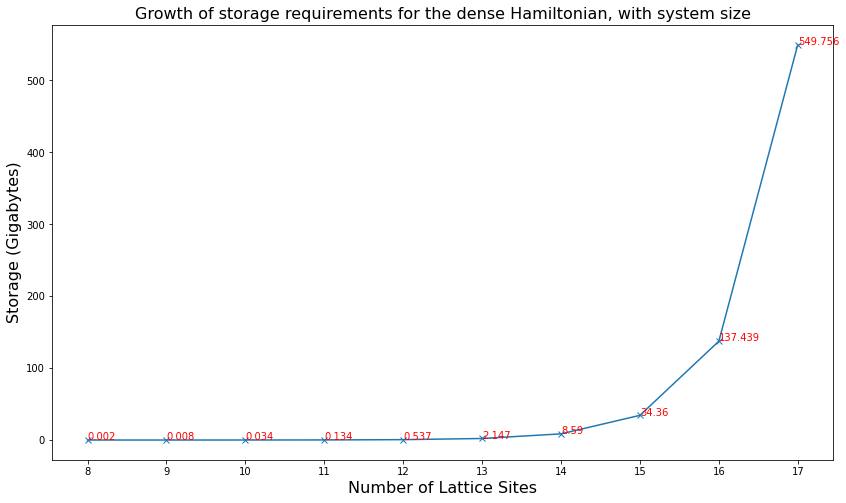

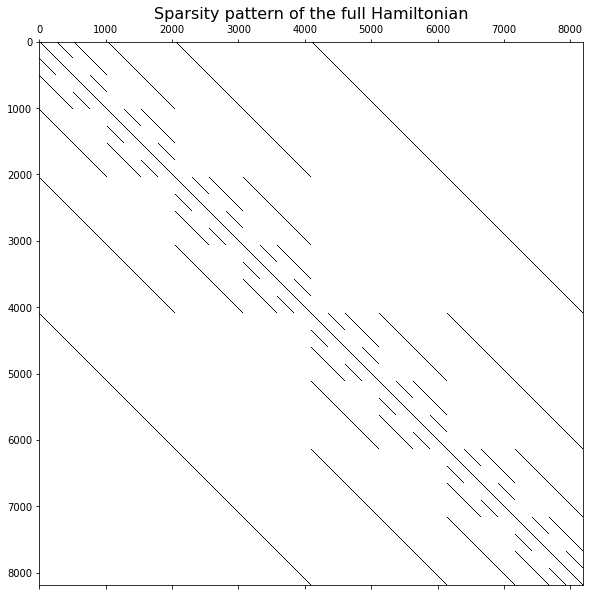

In [10]:
system_sizes = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
full_size_complex = []

# Plot to visualize the growth of storage requirements, with system size.
for s in system_sizes:
    size = ((2**s)**2)*32
    size /= 1e9
    full_size_complex.append(size)

plt.figure(figsize=(14,8))
plt.plot(system_sizes, full_size_complex, marker='x')
for a,b in zip(system_sizes, full_size_complex):
    plt.text(a,b,str(round(b,3)), color='r')
plt.xticks(system_sizes)
plt.xlabel('Number of Lattice Sites', fontsize=16)
plt.ylabel('Storage (Gigabytes)', fontsize=16)
plt.title('Growth of storage requirements for the dense Hamiltonian, with system size', fontsize=16)
plt.savefig('plots/storage-dense')

# Plot to check the sparsity pattern of the Hamiltonian
H_dense = H.todense()
plt.figure(figsize=(10,10))
print(sys.getsizeof(H))
print(sys.getsizeof(H_dense))
plt.spy(np.real(H_dense))
plt.title('Sparsity pattern of the full Hamiltonian', fontsize=16)
plt.savefig('plots/sparsity')

### Special simulation case 1 : h = -0.5, J = 0 (no nearest-neighbor interaction)


Time Evolution : Started

Time Evolution : Finished


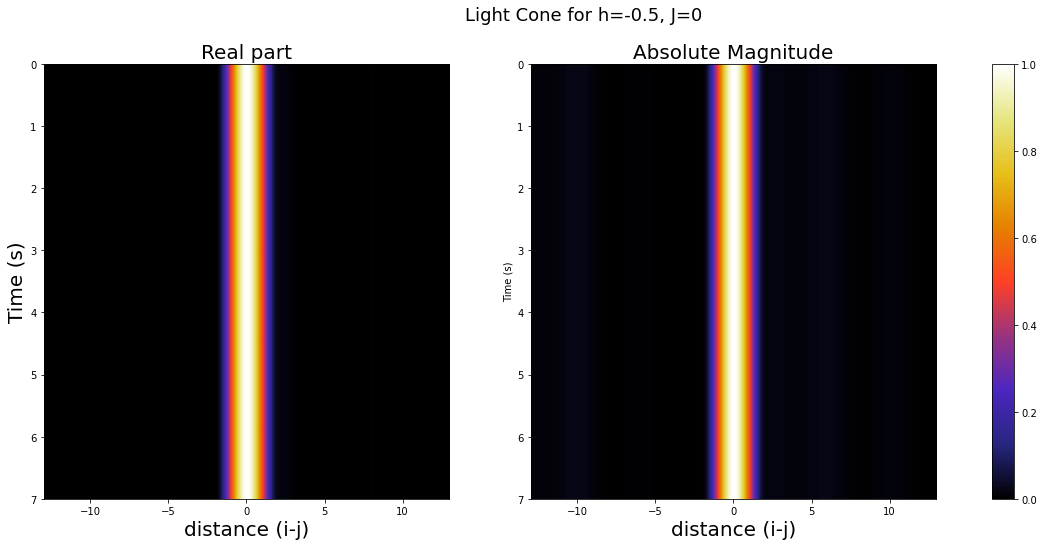

In [31]:
import matplotlib as mpl

H = construct_ising_hamiltonian(0, -0.5, adj=adjacency_matrix)
correlations = time_correlation(L, dt, N, psi0, Pauli_X, H)

fig, axs = plt.subplots(1,2, figsize=(20,8))
fig.suptitle(f"Light Cone for h=-0.5, J=0", fontsize=18)
extent = [-L, L, dt * N, 0]
cmap = mpl.cm.get_cmap('CMRmap')
normalizer = mpl.colors.Normalize(0,1)
cbar = mpl.cm.ScalarMappable(norm=normalizer, cmap=cmap)

img_real = axs[0].imshow(np.real(correlations), extent=extent, aspect="auto", cmap=cmap, norm=normalizer)
axs[0].set_xlabel('distance (i-j)', fontsize=20)
axs[0].set_ylabel('Time (s)', fontsize=20)
axs[0].set_title("Real part", fontsize=20)

img_abs = axs[1].imshow(np.abs(correlations), extent=extent, aspect="auto", cmap=cmap, norm=normalizer)
axs[1].set_xlabel('distance (i-j)', fontsize=20)
axs[1].set_ylabel('Time (s)')
axs[1].set_title("Absolute Magnitude", fontsize=20)

fig.colorbar(cbar, ax=axs.ravel().tolist())
plt.show()

### Special simulation case 2 : h = 0, J = 0.7 (only nearest-neighbor interaction)


Time Evolution : Started

Time Evolution : Finished


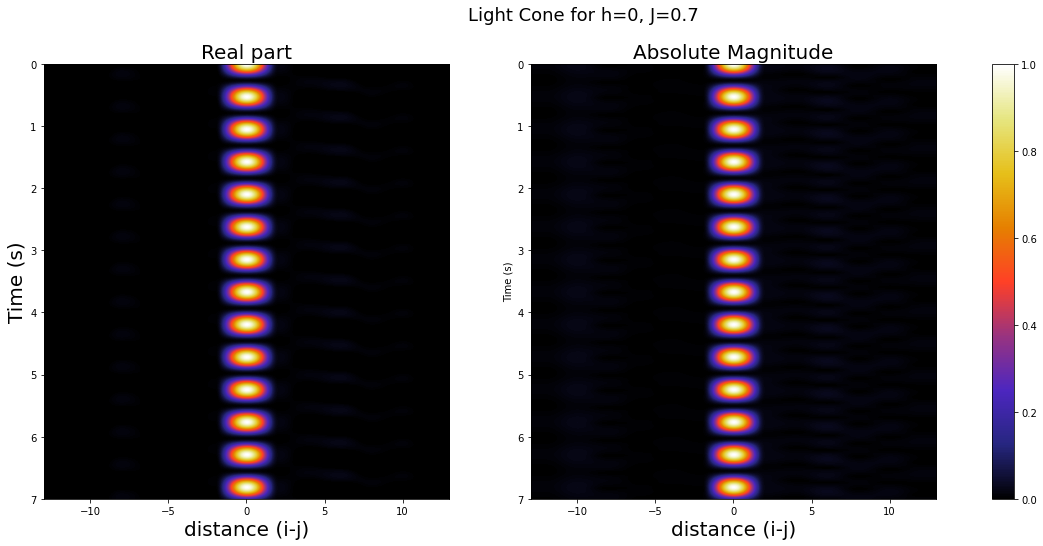

In [32]:
H = construct_ising_hamiltonian(3, 0, adj=adjacency_matrix)
correlations = time_correlation(L, dt, N, psi0, Pauli_X, H)

fig, axs = plt.subplots(1,2, figsize=(20,8))
fig.suptitle(f"Light Cone for h=0, J=0.7", fontsize=18)
extent = [-L, L, dt * N, 0]
cmap = mpl.cm.get_cmap('CMRmap')
normalizer = mpl.colors.Normalize(0,1)
cbar = mpl.cm.ScalarMappable(norm=normalizer, cmap=cmap)

img_real = axs[0].imshow(np.real(correlations), extent=extent, aspect="auto", cmap=cmap, norm=normalizer)
axs[0].set_xlabel('distance (i-j)', fontsize=20)
axs[0].set_ylabel('Time (s)', fontsize=20)
axs[0].set_title("Real part", fontsize=20)

img_abs = axs[1].imshow(np.abs(correlations), extent=extent, aspect="auto", cmap=cmap, norm=normalizer)
axs[1].set_xlabel('distance (i-j)', fontsize=20)
axs[1].set_ylabel('Time (s)')
axs[1].set_title("Absolute Magnitude", fontsize=20)

fig.colorbar(cbar, ax=axs.ravel().tolist())
plt.show()